In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [160]:
!pip uninstall statsmodels -y
!pip install -U statsmodels

Found existing installation: statsmodels 0.13.1
Uninstalling statsmodels-0.13.1:
  Successfully uninstalled statsmodels-0.13.1
  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [161]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [220]:
from pathlib import Path
path = Path().cwd().parent / 'input'
files = list(path.rglob('*'))
files

[PosixPath('/kaggle/input/tabular-playground-series-jan-2022'),
 PosixPath('/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv'),
 PosixPath('/kaggle/input/tabular-playground-series-jan-2022/train.csv'),
 PosixPath('/kaggle/input/tabular-playground-series-jan-2022/test.csv')]

In [224]:
train = pd.read_csv(files[2])
train['date'] = pd.to_datetime(train['date'], errors='coerce')
train = train.set_index('date')

test = pd.read_csv(files[3])
test['date'] = pd.to_datetime(test['date'], errors='coerce')
test = test.set_index('date')

train
test

,row_id,country,store,product,num_sold
date,,,,,
2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329
2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520
2015-01-01,2,Finland,KaggleMart,Kaggle Sticker,146
2015-01-01,3,Finland,KaggleRama,Kaggle Mug,572
2015-01-01,4,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...
2018-12-31,26293,Sweden,KaggleMart,Kaggle Hat,823
2018-12-31,26294,Sweden,KaggleMart,Kaggle Sticker,250
2018-12-31,26295,Sweden,KaggleRama,Kaggle Mug,1004


,row_id,country,store,product
date,,,,
2019-01-01,26298,Finland,KaggleMart,Kaggle Mug
2019-01-01,26299,Finland,KaggleMart,Kaggle Hat
2019-01-01,26300,Finland,KaggleMart,Kaggle Sticker
2019-01-01,26301,Finland,KaggleRama,Kaggle Mug
2019-01-01,26302,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...
2019-12-31,32863,Sweden,KaggleMart,Kaggle Hat
2019-12-31,32864,Sweden,KaggleMart,Kaggle Sticker
2019-12-31,32865,Sweden,KaggleRama,Kaggle Mug


In [244]:
# Checking before resample

def len_df(df_wide):
    train_dfs = {}
    test_dfs = {}
    for cat in df_wide['country'].unique():
        for cat_ in df_wide['store'].unique():
            for cat__ in df_wide['product'].unique():
                mask = (df_wide['country']==cat) & (df_wide['store']==cat_) & (df_wide['product']==cat__)
                train_dfs[cat+cat_+cat__] = df_wide[mask]
                
                train_dfs[cat+cat_+cat__] = train_dfs[cat+cat_+cat__]
                print(df_wide[mask].shape, end=' ')
    return dfs

train_dfs = len_df(train)
test_dfs = len_df(test)

(1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) 

In [245]:
# Checking after resample

train2 = train.groupby(['country', 'store', 'product']).resample('D').sum()
train2 = train2.reset_index(level=[0,1,2])

test2 = test.groupby(['country', 'store', 'product']).resample('D').sum()
test2 = test2.reset_index(level=[0,1,2])

train2_dfs = len_df(train)
test2_dfs = len_df(test)

(1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (1461, 5) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) (365, 4) 

In [252]:
# Exploring categoricals

for col in train2[['country', 'store', 'product']]:
    f'{col}, {train2[col].unique()}'

"country, ['Finland' 'Norway' 'Sweden']"

"store, ['KaggleMart' 'KaggleRama']"

"product, ['Kaggle Hat' 'Kaggle Mug' 'Kaggle Sticker']"

In [326]:
# Simple Split



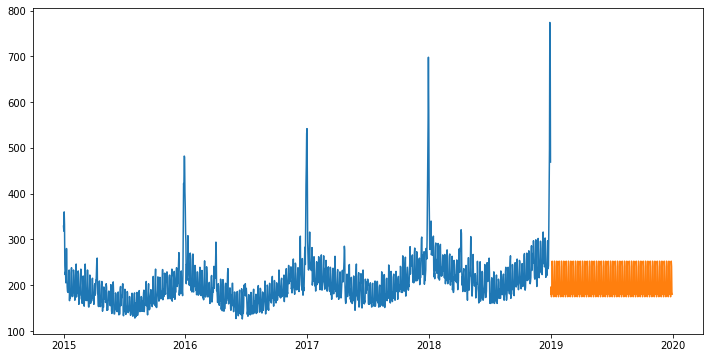

In [325]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from math import sin
from random import random
import matplotlib.pyplot as plt

names = list(train2_dfs.keys())
ser = train2_dfs[names[0]]['num_sold']
res = STLForecast(ser, ARIMA, seasonal=23, robust=True).fit()
#pred = res.get_prediction()
forec = res.forecast(365)

fig, ax = plt.subplots(figsize=(12,6))
_ = ax.plot(ser)
#_ = ax.plot(pred)
_ = ax.plot(forec)

In [189]:
class GA_Statsmodels():
    def __init__(self, 
                 params, 
                 eval_func,
                 eval_weights,
                 #X_train,
                 #X_test,
                 #y_train,
                 #y_test,
                 #lr=0.0001,
                 sel_tournsize=2, 
                 cx_uniform_prob=0.5, 
                 mut_shuffle_idx_prob=0.1, 
                 n_pop=35, 
                 n_gen=35, 
                 n_hof=5, 
                 cx_prob=0.5, 
                 mut_prob=0.1, 
                 n_jobs=1
                ):
        self.params = params
        self.eval_func = eval_func
        self.eval_weights = eval_weights
        
        #self.X_train = X_train
        #self.X_test = X_test
        #self.y_train = y_train
        #self.y_test = y_test
        #self.image_folder = image_folder
        #self.batch_size = batch_size
        #self.lr = lr
        
        self.sel_tournsize = sel_tournsize
        self.cx_uniform_prob = cx_uniform_prob
        self.mut_shuffle_idx_prob = mut_shuffle_idx_prob
        self.n_pop = n_pop
        self.n_gen = n_gen
        self.n_hof = n_hof
        self.cx_prob = cx_prob
        self.mut_prob = mut_prob
        
        self.n_jobs = n_jobs

        self._pad_params()
        self._create_fitness_and_indiv()
        self._register_indiv_and_pop_generators()
        #self._register_eval_func()
        #self._register_selection_crossover_mutation_methods()

    def _pad_params(self):
        """Pad params for crossover shuffle idx method"""
        assert isinstance(self.params, dict), 'Params must be a dict, i.e. estimator.get_params()'
        params_count = {k: len(v) for k,v in self.params.items()}
        max_length, max_key = -99, ''
        for k, v in params_count.items():
            if v <= max_length:
                continue
            else:
                max_key = k
                max_length = v
        assert isinstance(max_length, int), 'The max length between all params must be an int'
        # cycle through params for max length param, otherwise infinite cycle
        values_padded = (cycle(v) if k!=max_key else v for k,v in self.params.items())
        values_padded = zip(*values_padded)  # ('a', 1, 14), ('b', 2, 16), ('c', 3, 16) ...
        values_padded = zip(*values_padded)  # ('a', 'b', 'c'), (1, 2, 3), (14, 15, 16)...
        padded_params = {}
        for k, v in zip(self.params, values_padded):
            padded_params[k] = v
        self.padded_params = padded_params
        print('Params padded')

    def _create_fitness_and_indiv(self):
        """Create GA individual and fitness entities (classes)"""
        ga_cr.create('Fitness', ga_b.Fitness, weights=self.eval_weights)
        ga_cr.create('Individual', list, fitness=ga_cr.Fitness)
        print('GA entities created')

    def _gen_params_to_ga(self):
        """Generate index for each param for individual"""
        max_dict = len(self.padded_params)
        max_length = len(list(self.padded_params.values())[0])
        idxs = [randint(0, max_length-1) for _ in range(max_dict)]
        return idxs
    
    def _register_indiv_and_pop_generators(self):
        """Register GA individual and population generators"""
        self.tb = ga_b.Toolbox()

        if self.n_jobs > 1:
            from multiprocessing import Pool
            pool = Pool()
            self.tb.register("map", pool.map)

        self.tb.register("individual", ga_t.initIterate, ga_cr.Individual, self._gen_params_to_ga)
        #print('indiv', self.tb.individual())
        self.tb.register("population", ga_t.initRepeat, list, self.tb.individual)
        #print('population', self.tb.population(n=2))
        print('GA entities\' methods registered')
        
    def _register_eval_func(self):
        """Set GA evaluate individual function"""
        self.tb.register("evaluate",
                        self.eval_func,
                        padded_params=self.padded_params,
                        #image_folder=self.image_folder,
                        #X_train=self.X_train,
                        #X_test=self.X_test, 
                        #y_train=self.y_train, 
                        #y_test=self.y_test,
                        #batch_size=self.batch_size,
                        #lr=self.lr
                        )
        #print(list(self.tb.evaluate(indiv) for indiv in self.tb.population(3)))
        print('GA eval function registered')
    
    def _register_selection_crossover_mutation_methods(self):
        self.tb.register("select", ga_t.selTournament, tournsize=self.sel_tournsize)
        self.tb.register("mate", ga_t.cxUniform, indpb=self.cx_uniform_prob)
        self.tb.register("mutate", ga_t.mutShuffleIndexes, indpb=self.mut_shuffle_idx_prob)
        print('GA sel-cx-mut methods registered')
        
    def run_ga_search(self):
        """GA Search"""
        pop = self.tb.population(n=self.n_pop)
        hof = ga_t.HallOfFame(self.n_hof)

        # Stats stdout
        #stats = ga_t.Statistics(lambda ind: ind.fitness.values )
        stats1 = ga_t.Statistics(lambda ind: ind.fitness.values[0] )
        stats2 = ga_t.Statistics(lambda ind: ind.fitness.values[1] )
        stats3 = ga_t.Statistics(lambda ind: ind.fitness.values[2] )
        stats = ga_t.MultiStatistics(accuracy=stats1, risk=stats2, complexity=stats3)
        stats.register("avg", np.mean)
        #stats.register("std", np.std)
        #stats.register("min", np.min)
        #stats.register("max", np.max)

        # History
        #hist = tools.History()
        #toolbox.decorate("select", hist.decorator)
        #tb.decorate("mate", hist.decorator)
        #tb.decorate("mutate", hist.decorator)
        #hist.update(pop)

        # GA Run
        pop, log = ga_algo.eaSimple(pop, self.tb, cxpb=self.cx_prob, 
                                    mutpb=self.mut_prob, ngen=self.n_gen, 
                                    stats=stats, halloffame=hof, verbose=True)
        
        # Convert back params
        hof_ = {}
        for i in range(self.n_hof):
            hof_['hof_' + str(i)] = self._ga_to_params(hof[i])

        return pop, log, hof_
    
    def _ga_to_params(self, idx_params):
        """Convert back idx to params"""
        res = {}
        for (k,v), idx in zip(self.padded_params.items(), idx_params):
            res[k] = v[idx]
        return res

In [ ]:
net_params = {
    'ar': [0,1,2,3,4],
    'd': [0,1,2,3],
    'ma': [0,1,2,3,4],
    
    
}

def net_eval_indiv(individual, padded_params):
    """Evaluate individual's genes (estimator's params)"""
    # Params
    indiv_params = {k : list(v)[idx] for (k,v), idx in zip(padded_params.items(), individual)}
    
    # Data

    # Model
    try:
        net = NET(batch_size=learning_params['batch_size'], params=net_params)
        net = net.to(device)

        # Optimizer
        optimizer = Adam(net.parameters(), lr=learning_params['lr'])
        criterion = nn.NLLLoss()

        # Train
        #train_ds = DS(X_train, y_train)  # TODO refactor out
        train_dl = DataLoader(image_folder,
                            batch_size=learning_params['batch_size'],
                            shuffle=True,
                            num_workers=2,
                            drop_last=True)

        for epoch in range(1):
            #running_loss = []
            train_correct = 0
            train_total = 0
            for i, (inputs, labels) in enumerate(train_dl):
                if i <= 40:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = net(inputs)
                    outputs = pt_log(outputs)

                    optimizer.zero_grad()
                    loss = criterion(outputs, labels).mean()
                    loss.backward()
                    optimizer.step()

                    # print statistics
                    #running_loss.append(loss.item())
                    _, predicted = pt_max(outputs.data, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                    train_accuracy = train_correct / train_total * 100
                    #print(f'TRAIN {train_accuracy:^5.2f} %', end=' ')
                else:
                    break
    except BaseException as e:
        print(e)
        return (0.01, 10, 1000000,)
        
    # Eval
    """with no_grad():
        net = net.eval()
        test_ds = DS(X_test, y_test)  # TODO refactor out
        test_dl = DataLoader(test_ds,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=True)
        #running_loss = []
        test_correct = 0
        test_total = 0
        for i, (inputs, labels) in enumerate(test_dl):
            if i <= 100:
                #inputs = inputs.cuda()
                #labels = labels.cuda()
                outputs = net(inputs)

                # print statistics
                #running_loss.append(loss.item())
                _, predicted = pt_max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
                test_accuracy = test_correct / test_total * 100
            else:
                break
        #print(f'TEST {test_accuracy:^5.2f} %')"""
        
    # Risk
    inputs = inputs.to(device)
    risk = mean(prod(net(inputs)*10, dim=1))
    if isnan(risk):
        risk = 10
    else:
        risk = float(risk)
        
    # Complexity
    compl = net.count_weights_biases()

    return (train_accuracy, risk, compl,)

net_weights = (1, -1, -1)

In [158]:
!conda list statsmodels

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
statsmodels               0.12.2                   pypi_0    pypi


2015-01-31    10.236409
2015-02-28    11.379237
2015-03-31    11.398501
2015-04-30    10.575964
2015-05-31     9.907102
                ...    
2020-08-31     9.611569
2020-09-30     9.946288
2020-10-31    10.491825
2020-11-30    10.979775
2020-12-31    11.360785
Freq: M, Length: 72, dtype: float64

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02404D-01    |proj g|=  2.67777D-03

At iterate    5    f=  6.02394D-01    |proj g|=  3.42740D-03

At iterate   10    f=  6.02393D-01    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12      1     0     0   0.000D+00   6.024D-01
  F =  0.60239256936697472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [ ]:
if False:
    res = ARIMA(temp, (2,2,0)).fit(disp=0)
    forec_periods = 24
    forec, stderr, conf_int = res.forecast(forec_periods)
    forec = pd.Series(forec, index=[temp.index.max()+pd.DateOffset(months=i+1) for i in range(forec_periods)])
    forec

    fig, ax = plt.subplots(figsize=(12,6))
    _ = ax.plot(temp)
    _ = ax.plot(forec)